# Análise de Dados - Spotify
A análise abaixo foi feita com os dados da minha conta que solicitei no site do Spotify. O objetivo foi realizar uma análise exploratória de dados em um dataset próprio, como forma de exercício. 



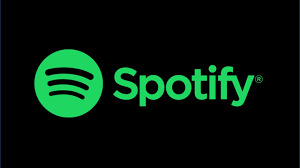

Vamos responder algumas perguntas, como: 
* quanto tempo de áudio foi escutado;
* qual a média diária de minutos escutados & músicas tocadas;
* quantidade máxima de horas escutadas e músicas tocadas em 1 dia;
* quais os 10 artistas e as 10 músicas mais tocadas e escutadas;
* em qual dia da semana e hora do dia eu escuto música com mais frequência;

Por fim, vamos fazer um heatmap do meu uso ativo no Spotify.

## Obtenção dos Dados
Os dados utilizados foram obtidos a partir da minha conta do Spotify e solicitados em AGO/2021. Para essa análise irei utilizar o arquivo `StreamingHistory0.json`.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib
import seaborn as sns
from wordcloud import WordCloud 

%matplotlib inline


In [2]:
# importar o arquivo StreamingHistory0 para um DataFrame
df = pd.read_json("StreamingHistory0.json")

# salvar o arquivo em csv
df.to_csv("spotify_data.csv") 

## Entendendo os Dados


**Dicionário das variáveis**

* `endTime` - Data/horário
* `artistName` - Nome do artista
* `trackName` - Nome da música
* `msPlayed` - Tempo escutado em milissegundos



In [ ]:
# visualizando 5 dados aleatórios
df.sample(5)

,endTime,artistName,trackName,msPlayed
1883,2021-04-21 00:19,Eagles,Hotel California - 2013 Remaster,2986
1230,2021-02-06 21:19,Charles Aznavour,La bohème,5315
2729,2021-07-10 22:33,Le Couleur,Femme,2773
410,2020-09-22 18:33,Fréhel,Si tu n'étais pas là,209066
2008,2021-04-24 21:59,Vianney,Les filles d'aujourd'hui,8591


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos do dataset e se há dados ausentes
df.info()

Entradas:	 2871
Variáveis:	 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     2871 non-null   object
 1   artistName  2871 non-null   object
 2   trackName   2871 non-null   object
 3   msPlayed    2871 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 89.8+ KB


In [ ]:
df.nunique()

endTime       2185
artistName     298
trackName      512
msPlayed      1476
dtype: int64

### Convertendo tipo Object em Datetime
Vamos converter `timestamp` para Datetime, um formato de data e hora que o Pandas consegue realizar cálculos, e de UTC para nosso fuso horário local.

In [3]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['endTimeBR'] = pd.to_datetime(df['endTime'], utc=True)

In [4]:
# mudando a coluna timestamp para o índice do dataframe
df = df.set_index('endTimeBR')

# convertendo o fuso horário UTC
df.index = df.index.tz_convert('America/Sao_Paulo')

# redefinindo o indice para que timestamp vire coluna novamente
df = df.reset_index()

df.head()

,endTimeBR,endTime,artistName,trackName,msPlayed
0,2020-08-31 16:51:00-03:00,2020-08-31 19:51:00,Arctic Monkeys,Old Yellow Bricks,3008
1,2020-09-02 09:53:00-03:00,2020-09-02 12:53:00,Arctic Monkeys,Old Yellow Bricks,190223
2,2020-09-02 09:57:00-03:00,2020-09-02 12:57:00,Arctic Monkeys,Crying Lightning,224831
3,2020-09-02 10:00:00-03:00,2020-09-02 13:00:00,Arctic Monkeys,Brianstorm,172866
4,2020-09-02 10:05:00-03:00,2020-09-02 13:05:00,Arctic Monkeys,No. 1 Party Anthem,243131


### Criando as colunas relacionadas `endTimeBR`

In [5]:
df['weekday'] = df['endTimeBR'].dt.weekday # (Segunda=0, Domingo=6)
df['hour'] = df['endTimeBR'].dt.hour
df['date'] = df['endTimeBR'].dt.date
df['year'] = pd.DatetimeIndex(df["endTimeBR"]).year
df['month'] = pd.DatetimeIndex(df["endTimeBR"]).month
df['day'] = pd.DatetimeIndex(df["endTimeBR"]).day
df['time'] = pd.DatetimeIndex(df["endTimeBR"]).time
df['day-name'] = df["endTimeBR"].apply(lambda x: x.day_name())
df['Count'] = 1 

df.head()

,endTimeBR,endTime,artistName,trackName,msPlayed,weekday,hour,date,year,month,day,time,day-name,Count
0,2020-08-31 16:51:00-03:00,2020-08-31 19:51:00,Arctic Monkeys,Old Yellow Bricks,3008,0,16,2020-08-31,2020,8,31,16:51:00,Monday,1
1,2020-09-02 09:53:00-03:00,2020-09-02 12:53:00,Arctic Monkeys,Old Yellow Bricks,190223,2,9,2020-09-02,2020,9,2,09:53:00,Wednesday,1
2,2020-09-02 09:57:00-03:00,2020-09-02 12:57:00,Arctic Monkeys,Crying Lightning,224831,2,9,2020-09-02,2020,9,2,09:57:00,Wednesday,1
3,2020-09-02 10:00:00-03:00,2020-09-02 13:00:00,Arctic Monkeys,Brianstorm,172866,2,10,2020-09-02,2020,9,2,10:00:00,Wednesday,1
4,2020-09-02 10:05:00-03:00,2020-09-02 13:05:00,Arctic Monkeys,No. 1 Party Anthem,243131,2,10,2020-09-02,2020,9,2,10:05:00,Wednesday,1


### Transformando de miliseconds para minutes e hours

In [ ]:
df["Played(hh-mm-ss)"] = pd.to_timedelta(df["msPlayed"], unit='ms')
df.head()

,endTimeBR,endTime,artistName,trackName,msPlayed,weekday,hour,year,month,day,time,day-name,Count,Played(hh-mm-ss)
0,2020-08-31 16:51:00-03:00,2020-08-31 19:51:00,Arctic Monkeys,Old Yellow Bricks,3008,0,16,2020,8,31,16:51:00,Monday,1,0 days 00:00:03.008000
1,2020-09-02 09:53:00-03:00,2020-09-02 12:53:00,Arctic Monkeys,Old Yellow Bricks,190223,2,9,2020,9,2,09:53:00,Wednesday,1,0 days 00:03:10.223000
2,2020-09-02 09:57:00-03:00,2020-09-02 12:57:00,Arctic Monkeys,Crying Lightning,224831,2,9,2020,9,2,09:57:00,Wednesday,1,0 days 00:03:44.831000
3,2020-09-02 10:00:00-03:00,2020-09-02 13:00:00,Arctic Monkeys,Brianstorm,172866,2,10,2020,9,2,10:00:00,Wednesday,1,0 days 00:02:52.866000
4,2020-09-02 10:05:00-03:00,2020-09-02 13:05:00,Arctic Monkeys,No. 1 Party Anthem,243131,2,10,2020,9,2,10:05:00,Wednesday,1,0 days 00:04:03.131000


In [7]:
# De miliseconds para minutes 
df['minPlayed'] = df.apply(lambda x: round(x['msPlayed']/60000,2), axis=1)

# De miliseconds para hours 
df['hoursPlayed'] = df['msPlayed'].apply(lambda x: x / 3.6e+6).round(3)


In [ ]:
df.head()

,endTimeBR,endTime,artistName,trackName,msPlayed,weekday,hour,year,month,day,time,day-name,Count,Played(hh-mm-ss),hoursPlayed,minPlayed
0,2020-08-31 16:51:00-03:00,2020-08-31 19:51:00,Arctic Monkeys,Old Yellow Bricks,3008,0,16,2020,8,31,16:51:00,Monday,1,0 days 00:00:03.008000,0.001,0.05
1,2020-09-02 09:53:00-03:00,2020-09-02 12:53:00,Arctic Monkeys,Old Yellow Bricks,190223,2,9,2020,9,2,09:53:00,Wednesday,1,0 days 00:03:10.223000,0.053,3.17
2,2020-09-02 09:57:00-03:00,2020-09-02 12:57:00,Arctic Monkeys,Crying Lightning,224831,2,9,2020,9,2,09:57:00,Wednesday,1,0 days 00:03:44.831000,0.062,3.75
3,2020-09-02 10:00:00-03:00,2020-09-02 13:00:00,Arctic Monkeys,Brianstorm,172866,2,10,2020,9,2,10:00:00,Wednesday,1,0 days 00:02:52.866000,0.048,2.88
4,2020-09-02 10:05:00-03:00,2020-09-02 13:05:00,Arctic Monkeys,No. 1 Party Anthem,243131,2,10,2020,9,2,10:05:00,Wednesday,1,0 days 00:04:03.131000,0.068,4.05


## Análise dos Dados


###**Q1.Verificando quanto tempo de audio foi escutado nesse periodo**

In [8]:
inicio = df.endTimeBR.min().strftime('%d/%m/%Y')
fim = df.endTimeBR.max().strftime('%d/%m/%Y')

print("Foi escutado {} horas de músicas entre os dias {} e {}." .format
      (int(df.hoursPlayed.sum()), inicio, fim))


Foi escutado 105 horas de músicas entre os dias 31/08/2020 e 01/09/2021.


#### **Média diária de minutos escutados e quantidade máxima de horas escutadas em um dia**

In [9]:
# agrupando dados por data e minutos escutados
minutosDia = df.groupby('endTimeBR')[['minPlayed']].sum()

# agrupando dados por dias e verificando a média de minutos escutados
mediaMinutosDia = minutosDia.resample('d').sum().round().mean()

# agrupando dados por dias e verificando o máximo de minutos
maximoMinutosDia = minutosDia.resample('d').sum().round().max()
print('A média diária de minutos escutados foi de {} min e o máximo de horas escutadas em um dia foi de {} horas.'
    .format(mediaMinutosDia[0].round(), int(maximoMinutosDia[0]/60)))

A média diária de minutos escutados foi de 17.0 min e o máximo de horas escutadas em um dia foi de 4 horas.


#### **Média diária de músicas tocadas e quantidade máxima de músicas tocadas em um dia**

In [10]:
# agrupando dados por data e quantidade de músicas tocadas
countDia = df.groupby('endTimeBR')[['Count']].sum()

# agrupando dados por dias e verificando a média de músicas tocadas
mediaCountDia = countDia.resample('d').sum().mean()

# agrupando dados por dias e verificando o máximo de músicas tocadas 
maximoCountDia = countDia.resample('d').sum().round().max()

print('A média diária de músicas tocadas foi de {} e o máximo de músicas tocadas em um dia foi de {}.'
    .format(int(mediaCountDia[0].round()), maximoCountDia[0]))

A média diária de músicas tocadas foi de 8 e o máximo de músicas tocadas em um dia foi de 189.


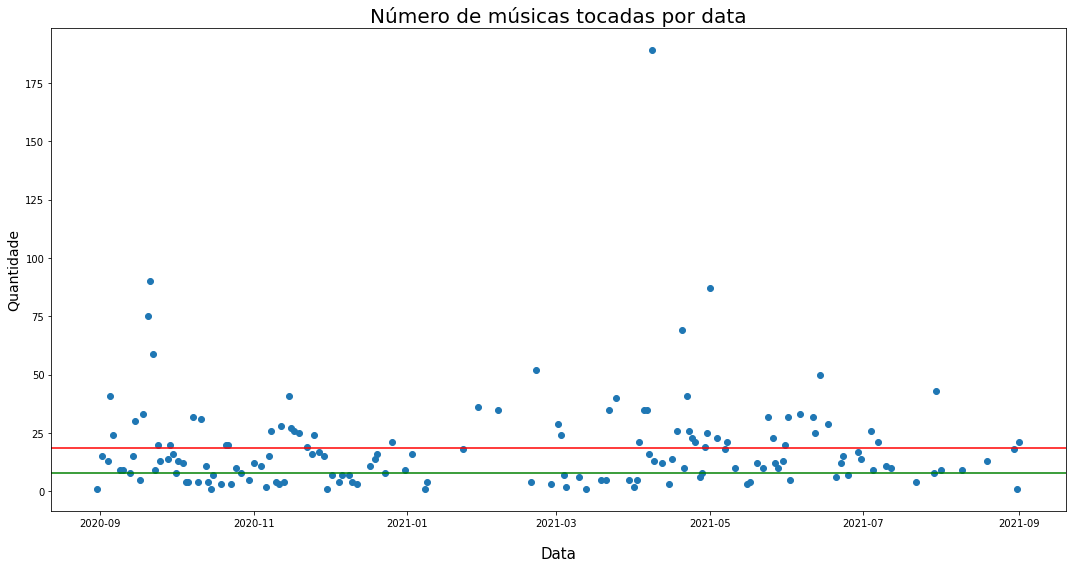

In [15]:
numMus = df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(x=numMus.index, y=numMus["Count"]);

ax.set_title("Número de músicas tocadas por data", fontsize=20)
ax.set_xlabel('Data', fontsize=15, labelpad=18)
ax.set_ylabel('Quantidade', fontsize=14)

ax.axhline(numMus["Count"].mean(), linestyle="-", color="r"); # média da quantidade de musicas tocadas
ax.axhline(mediaCountDia[0], linestyle="-", color="g"); # média diária de músicas tocadas

plt.tight_layout()

####**Horas escutadas por mês**

In [ ]:
# agrupando dados por data e horas escutados
horasDia = df.groupby('endTimeBR')[['hoursPlayed']].sum()

# agrupando dados por mês 
horasMes = horasDia.resample('M').sum().round()

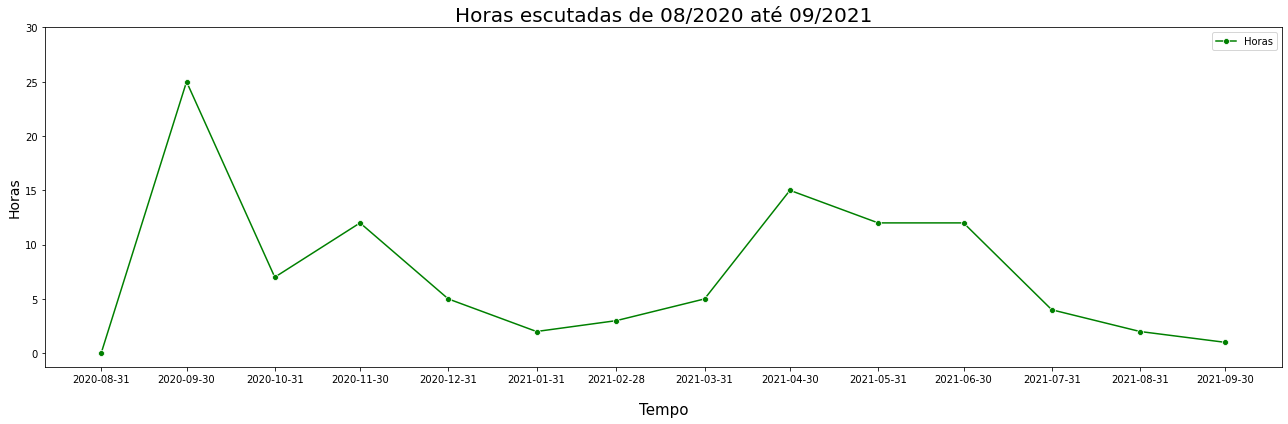

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))  

ax = sns.lineplot(x='endTimeBR',
                  y='hoursPlayed',
                  data=horasMes,
                  marker='o',
                  color="g")

# titulo
ax.set_title('Horas escutadas de {} até {}'.format(inicio[3:],   
             fim[3:]), fontsize=20)
# legenda
ax.legend(['Horas'], loc='upper right')

ax.set_xlabel('Tempo', fontsize=15, labelpad=18)
ax.set_ylabel('Horas', fontsize=14)

# escala do eixo x
plt.xticks(horasMes.index)

# escala do eixo y
plt.yticks([0, 5, 10, 15, 20, 25, 30])

plt.tight_layout()

###**Q2.Quais os 10 artistas mais tocados e os mais ouvidos?**

####**Mais tocados**

In [ ]:
# artistas mais tocados
top10artist_count = df.groupby(["artistName"])[["hoursPlayed", "minPlayed","Count"]].sum().sort_values(by="Count",ascending=False).head(10).reset_index()
top10artist_count

,artistName,hoursPlayed,minPlayed,Count
0,Arctic Monkeys,3.561,213.57,119
1,Brigitte Bardot,4.291,258.58,109
2,Carla Bruni,4.265,256.05,105
3,Jean Sablon,4.062,243.41,103
4,Édith Piaf,3.167,190.42,84
5,Françoise Hardy,2.818,169.56,73
6,Charles Trenet,2.219,133.68,70
7,Henri Salvador,2.685,160.17,63
8,Line Renaud,2.263,135.94,61
9,Sacha Distel,1.723,103.83,59


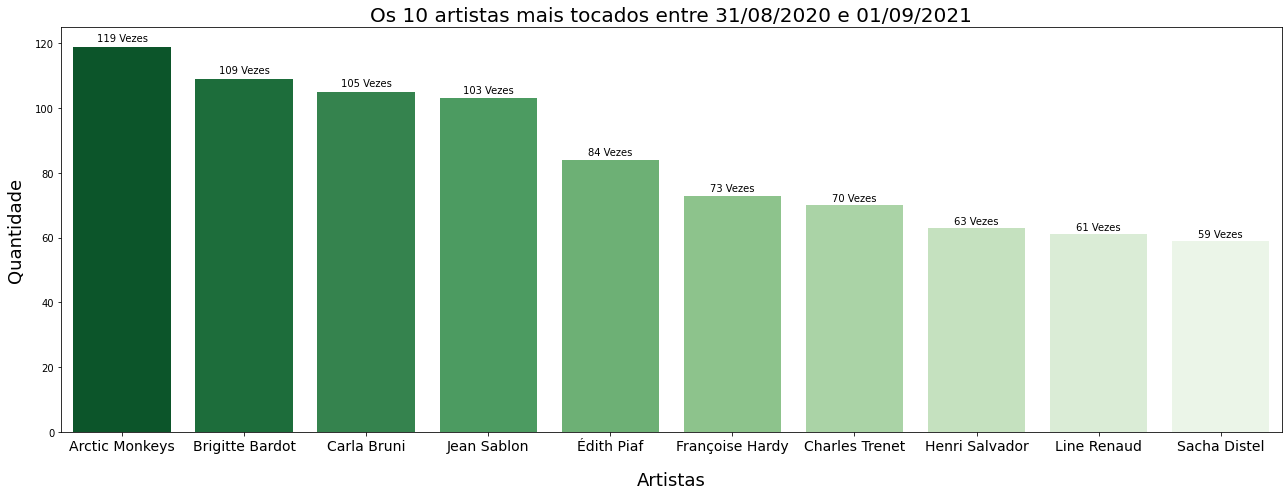

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))  

ax = sns.barplot(
    x=top10artist_count.artistName,
    y=top10artist_count.Count,
    palette="Greens_r"
)

ax = plt.title('Os 10 artistas mais tocados entre {} e {}'.format(inicio, fim), fontsize=20)
ax = plt.xlabel('Artistas', fontsize=18, labelpad=18)
ax = plt.ylabel("Quantidade", fontsize=18, labelpad=10)
ax = plt.xticks(size=14)

ax = plt.grid(False)

# definindo variáveis de anotações do gráfico
numtotal = range(top10artist_count.shape[0])
countArtista = top10artist_count.Count.values

# visualização dos valores em cada barra
for i in numtotal:
    plt.annotate("{} Vezes".format(int(countArtista[i])),
                 xy=(numtotal[i], countArtista[i] * 1.01),
                 fontsize=10,
                 ha='center',
                 va='bottom')

plt.tight_layout()

####**Mais escutados**

In [ ]:
# artistas mais escutados (em minutos)
top10Artist = df.groupby(["artistName"])["minPlayed"].sum().round().sort_values(ascending=False).head(10).reset_index()
top10Artist

,artistName,minPlayed
0,Brigitte Bardot,259.0
1,Carla Bruni,256.0
2,Diante do Trono,244.0
3,Jean Sablon,243.0
4,Louise Verneuil,236.0
5,Arctic Monkeys,214.0
6,Édith Piaf,190.0
7,Madeleine Peyroux,181.0
8,Françoise Hardy,170.0
9,Henri Salvador,160.0


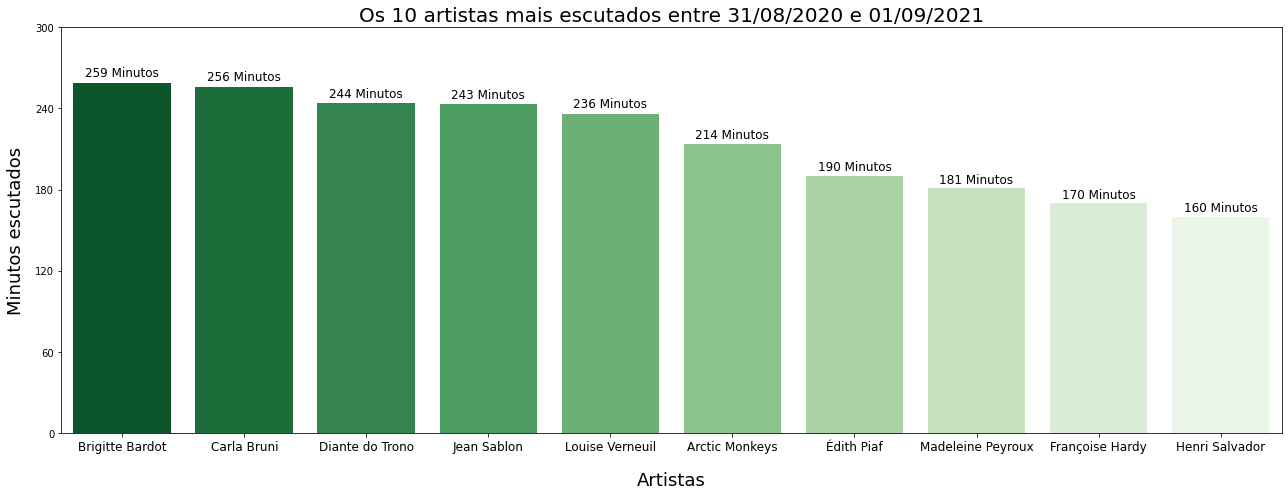

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))  

ax = sns.barplot(
    x=top10Artist.artistName,
    y=top10Artist.minPlayed,
    palette="Greens_r",
)

ax = plt.title('Os 10 artistas mais escutados entre {} e {}'.format(inicio, fim), fontsize=20)
ax = plt.xlabel('Artistas', fontsize=18, labelpad=18)
ax = plt.ylabel("Minutos escutados", fontsize=18, labelpad=10)
ax = plt.xticks(size=12)
ax = plt.yticks([0, 60, 120, 180, 240, 300])

ax = plt.grid(False)

# variáveis de anotações do gráfico
numTotal = range(top10Artist.shape[0])
minArtista = top10Artist.minPlayed.values

# visualização dos valores em cada barra
for i in numTotal:
    plt.annotate("{} Minutos".format(int(minArtista[i])),
                 xy=(numTotal[i], minArtista[i] * 1.01),
                 fontsize=12,
                 ha='center',
                 va='bottom')
    
plt.tight_layout() 

###**Q3.Quais as 10 músicas mais tocadas?**

In [ ]:
# 10 músicas mais tocadas
top10mus_count = df.groupby(['trackName', 'artistName'])[["hoursPlayed", "minPlayed","Count"]].sum().sort_values(by="Count", ascending=False).head(10).reset_index()
top10mus_count 

,trackName,artistName,hoursPlayed,minPlayed,Count
0,Quelqu'un m'a dit,Carla Bruni,2.632,158.36,67
1,Jardin d'hiver,Henri Salvador,2.664,158.88,62
2,La vie en rose,Édith Piaf,2.503,150.24,61
3,Le soleil,Brigitte Bardot,2.660,160.97,58
4,Ces petites choses,Jean Sablon,2.725,163.56,58
5,La belle vie,Sacha Distel,1.702,102.56,56
6,Femme,Le Couleur,2.656,158.25,55
7,Tous les garçons et les filles - Slow,Françoise Hardy,2.498,150.38,55
8,"C'est ça l'amour - Extrait de ""Cendrillon""",Luce,2.203,131.04,53
9,Vous qui passez sans me voir - Remasterisé en ...,Line Renaud,2.112,126.76,50


In [ ]:
# musicas mais escutadas (em minutos)
top10mus = df.groupby(['trackName', 'artistName'])[["hoursPlayed", "minPlayed","Count"]].sum().sort_values(by="minPlayed", ascending=False).head(10).reset_index()
top10mus

,trackName,artistName,hoursPlayed,minPlayed,Count
0,À mort amant,Louise Verneuil,3.138,188.03,36
1,Ces petites choses,Jean Sablon,2.725,163.56,58
2,Le soleil,Brigitte Bardot,2.660,160.97,58
3,Jardin d'hiver,Henri Salvador,2.664,158.88,62
4,Quelqu'un m'a dit,Carla Bruni,2.632,158.36,67
5,Femme,Le Couleur,2.656,158.25,55
6,Tous les garçons et les filles - Slow,Françoise Hardy,2.498,150.38,55
7,La vie en rose,Édith Piaf,2.503,150.24,61
8,"C'est ça l'amour - Extrait de ""Cendrillon""",Luce,2.203,131.04,53
9,Vous qui passez sans me voir - Remasterisé en ...,Line Renaud,2.112,126.76,50


### Wordcloud com as músicas mais tocadas

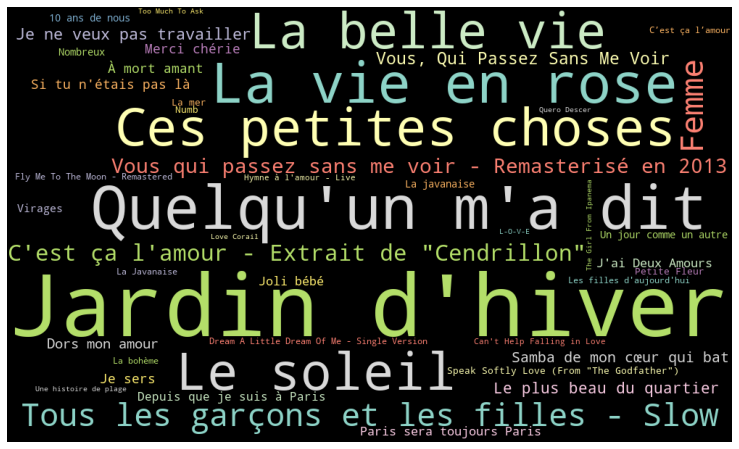

In [ ]:
fav_songs = df["trackName"].value_counts()

wordcloud = WordCloud(relative_scaling=1, normalize_plurals=False, 
                      colormap='Set3',
                      background_color='black', width=1000,
                      height=600, max_words=70, max_font_size=1000,
                      min_font_size=10).generate_from_frequencies(fav_songs)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

###**Q4. Em qual dia da semana eu escuto música com mais frequência?**

weekday
0    389
1    417
2    296
3    551
4    351
5    361
6    506
Name: endTimeBR, dtype: int64


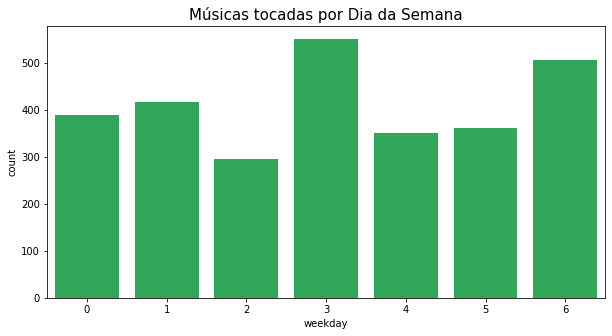

In [ ]:
print(df.groupby('weekday')['endTimeBR'].count())

# Monday=0, Sunday=6
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x=df['weekday'], ax=ax, color="#1DB954")
ax.set_title('Músicas tocadas por Dia da Semana', fontsize=15);


###**Q5. Em qual hora do dia eu escuto música com mais frequência?**

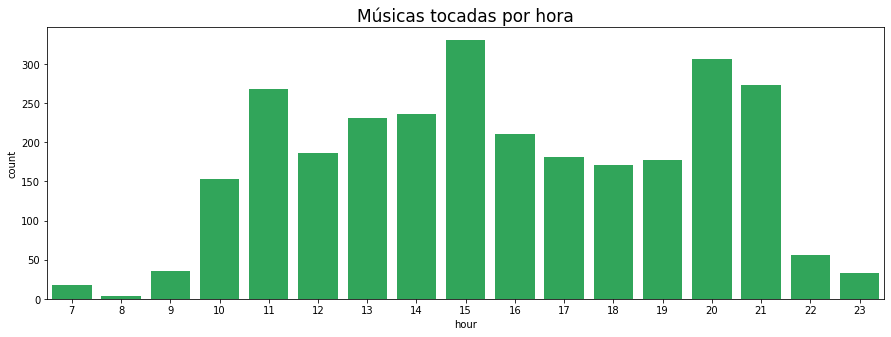

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x=df['hour'], ax=ax, color="#1DB954")
ax.set_title('Músicas tocadas por hora', fontsize=17);

###**Q6. Em qual mês eu mais escutei música?**

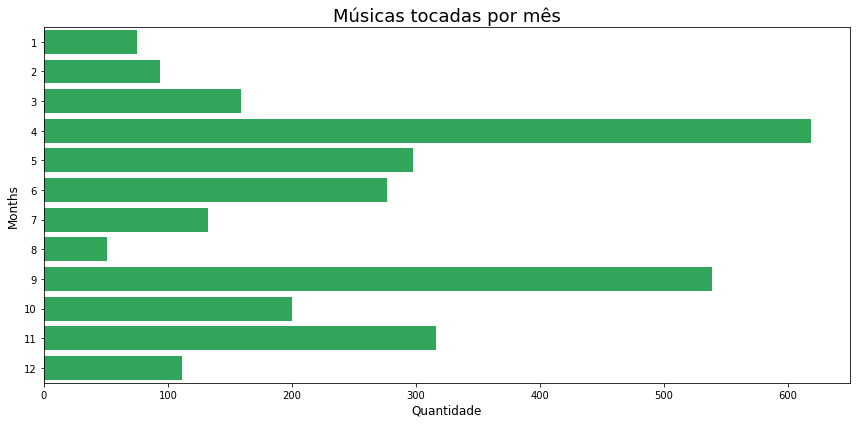

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(y=df.month, ax=ax, color= "#1DB954")
ax.set_title('Músicas tocadas por mês', fontsize=18);
ax.set_ylabel("Months", fontsize=12)
ax.set_xlabel("Quantidade", fontsize=12)

plt.tight_layout()

### Heatmap: Uso ativo Horas x Dia da semana 

In [ ]:
usage = df.groupby(['hour', 'weekday'])['artistName'].size().reset_index()
usage_pivot = usage.pivot("hour", 'weekday', 'artistName') # .pivot(index, columns, values)
usage_pivot.head()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
7,NaN,NaN,7.0,7.0,4.0,NaN,NaN
8,NaN,NaN,NaN,NaN,3.0,NaN,NaN
9,NaN,20.0,2.0,6.0,NaN,8.0,NaN
10,42.0,35.0,10.0,43.0,1.0,15.0,7.0
11,54.0,33.0,9.0,71.0,38.0,35.0,28.0


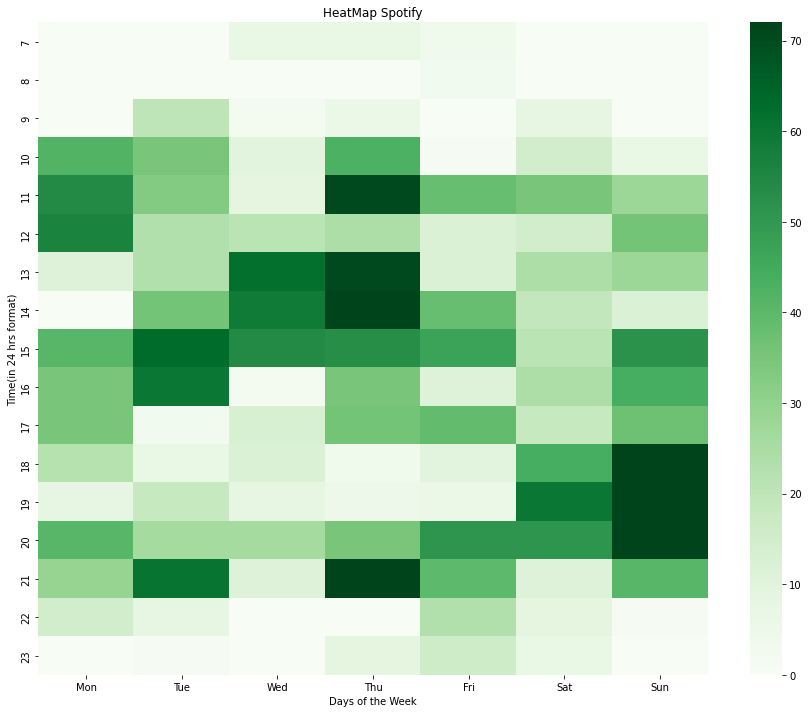

In [ ]:
days_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(usage_pivot.fillna(0), robust=True, cmap="Greens", ax = ax, xticklabels=days_name);
ax.set(title="HeatMap Spotify", xlabel="Days of the Week", ylabel="Time(in 24 hrs format)");